<a href="https://colab.research.google.com/github/Scanner20/ml/blob/main/TP_VETT_Grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option("display.max_columns",None)
path = "https://raw.githubusercontent.com/Scanner20/ml/main/vivienda/vivienda_12082021.csv"
data = pd.read_csv(path)


data.head()
#columnas_quitar=['url','titulo','descripcion','caractint','caractext','caractsec','otros_datos','latitud','longitud']
#data.drop(columnas_quitar, axis=1, inplace=True)
#data.head()

,tipo,precio,area_m2,habitaciones,banos,garajes,antiguedad,balcon,bano_auxiliar,comedor,estudio,servicios_publicos,ventilacion_natural,zona_de_lavanderia,en_conjunto_cerrado,garaje_parqueadero(s),gimnasio,piscina,salon_comunal,vivienda_multifamiliar,zona_infantil,zonas_verdes,bombas_de_gasolina,cerca_centro_comercial,comodas_vias_de_acceso,restaurantes,seguridad,supermercados_ccomerciales,trans_publico_cercano,bano_independiente,closet,cocina_integral,cocina_tipo_americano,instalacion_de_gas,acceso_pavimentado,canchas_deportivas,garaje(s),cerca_de_zona_urbana,parques_cercanos,zona_comercial,zona_residencial,estrato,terraza,patio,alcantarillado,arboles_frutales,bano_compartido,en_casa,establo,pozo_de_agua_natural,area_rural,ascensor,parqueadero_visitantes,porteria_recepcion,vigilancia,sobre_via_principal,cochera,calentador,chimenea,comedor_auxiliar,cuarto_de_servicio,deposito_bodega,hall_de_alcobas,parqueadero_interno,piso_de_alta_resistencia,piso_en_baldosa_marmol,piso_en_cemento,bahia_exterior_de_parqueo,cancha_de_squash,en_condominio,garaje_cubierto,oficina_de_negocios,planta_electrica,porteria_vigilancia,senderos_ecologicos,tanques_de_agua,sobre_via_secundaria,jardin,vista_panoramica,colegios_universidades,zona_campestre,barra_estilo_americano,citofono,circuito_cerrado_de_tv,salon_de_juegos,despensa,cancha_de_futbol,lote_en_construccion,cocina_equipada,zona_industrial,ascensores_comunales,con_administrador,sauna_turco_jacuzzi,shut_de_basura,todos_los_servicios,ubicada_en_edificio,zona_de_bbq,bosque_nativo,en_edificio,en_zona_residencial,jardines_exteriores,area_urbana,asador,vigilancia_privada_24*7,zona_de_camping,vigilancia_24x7,zona_de_hamacas,alarma_contra_incendio,deteccion_de_humo,lic_de_construccion,locales_comerciales,piso_en_madera,disponibilidad_wifi,en_zona_comercial,cerca_a_sector_comercial,nacimientos_de_agua,bano_de_servicio,servicio_de_internet,rio_quebrada_cercano(a),galpon,pesebrera,cancha_de_baloncesto,invernadero,kiosko,sala_de_internet,cancha_de_tennis,alarma,sistema_de_riego,con_vivienda,casa_de_trabajadores,bahias_de_parqueo,aire_acondicionado,amoblado,cocina_de_lena,escalera_de_emergencia,gabinete_de_incendios,ascensor(es)_inteligente(s),industrial,banos_comunales,banos_mixtos,control_de_acceso_digital,servicios_independientes,vivienda_bifamiliar,rociadores_de_agua,finca_ganadera,corrales,cuarto_de_conductores,con_casa_club,finca_agricola,finca_agroganadera,cableado_de_red,puerta_de_seguridad,puerta_electrica,mezzanine,esquinero,acceso_para_camiones,sensor_de_movimiento,auditorio,patio_interno,cuarto_de_servicio.1,cuarto_de_escoltas,panoramica_un_lado,cocineta,finca_avicola,piso_en_alfombra,jaula_de_golf,con_cerca_electrica,oficinas_administrativas,salon_de_videoconferencias,pasaje_comercial,en_club,con_casa_prefabricada,finca_cafetera,municipio,tipo_propiedad
0,Nueva,5.122629e+08,89.49,3.0,3.0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,apartamento
1,Usada,5.340000e+08,182.00,4.0,4.0,2.0,1 a 8 años,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

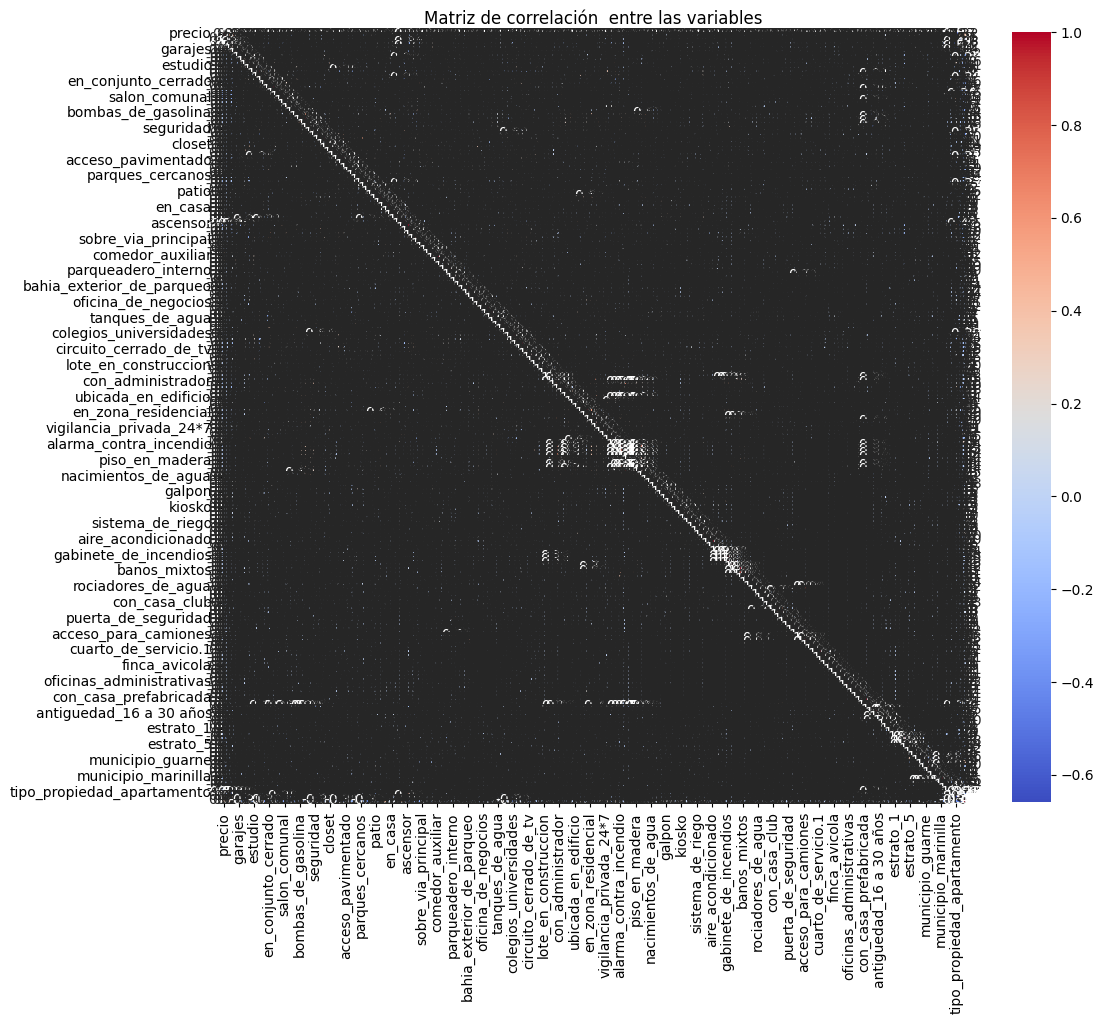

In [20]:
# Convertir variables categóricas a variables dummy (one-hot encoding)
df_encoded = pd.get_dummies(data, drop_first=True)
# Obtener la matriz de correlación

matriz_correlacion = df_encoded.corr()

# Mostrar la matriz de correlación
# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación  entre las variables')
plt.show()
#print(matriz_correlacion)


In [5]:
print('Mediana de los precios de la vivienda por tipo de propiedad')
print((data.groupby(['tipo_propiedad'])['precio'].quantile()/1000000))
print('**********************************')

Mediana de los precios de la vivienda por tipo de propiedad
tipo_propiedad
apartaestudio    285.0
apartamento      320.0
casa             684.0
finca            950.0
Name: precio, dtype: float64
**********************************


In [6]:
data['antiguedad'].value_counts()

,count
antiguedad,
1 a 8 años,1031
0,627
Menos de 1 año,339
9 a 15 años,251
16 a 30 años,187
Más de 30 años,48


In [7]:
columnas = ['tipo','precio', 'area_m2','habitaciones','banos','garajes','estrato','antiguedad','tipo_propiedad','municipio']
data = data[columnas]
data.shape

(2483, 10)

In [8]:
TARGET = ['precio']
x = data.drop(['precio'], axis=1)
y = data[TARGET]
x.head()

,tipo,area_m2,habitaciones,banos,garajes,estrato,antiguedad,tipo_propiedad,municipio
0,Nueva,89.49,3.0,3.0,1.0,0,0,apartamento,rionegro
1,Usada,182.00,4.0,4.0,2.0,4,1 a 8 años,casa,la ceja
2,Usada,4070.00,2.0,1.0,9.0,2,1 a 8 años,finca,guarne
3,Usada,274.00,4.0,5.0,0.0,1,16 a 30 años,finca,rionegro
4,Usada,49.00,1.0,2.0,1.0,4,0,apartamento,el retiro


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = pd.get_dummies(x, columns=['tipo','tipo_propiedad','municipio','antiguedad','estrato'], prefix=["estado","tipo","muni","antig","estrato"] )


x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size = 0.2 , random_state = 40)
x_train.head()


,area_m2,habitaciones,banos,garajes,estado_Nueva,estado_Usada,tipo_apartaestudio,tipo_apartamento,tipo_casa,tipo_finca,muni_el carmen de viboral,muni_el retiro,muni_guarne,muni_la ceja,muni_la unión,muni_llanogrande,muni_marinilla,muni_rionegro,muni_san antonio de pereira,muni_santuario,antig_0,antig_1 a 8 años,antig_16 a 30 años,antig_9 a 15 años,antig_Menos de 1 año,antig_Más de 30 años,estrato_0,estrato_1,estrato_2,estrato_3,estrato_4,estrato_5,estrato_6,estrato_Campestre
1459,5000.0,3.0,4.0,1.0,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
62,710.0,2.0,2.0,1.0,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
638,150.0,3.0,3.0,1.0,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
1724,142.0,4.0,3.0,1.0,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
226,66.5,2.0,2.0,1.0,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False


In [10]:
from sklearn.preprocessing import StandardScaler
esc = StandardScaler()
x_train_esc = pd.DataFrame(esc.fit_transform(x_train),columns = x_train.columns, index = x_train.index)
x_test_esc = pd.DataFrame(esc.transform(x_test),columns = x_test.columns, index = x_test.index)
x_train.shape





(1986, 34)

In [11]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [12]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

model1 = Ridge(solver='lsqr')
model1.fit(x_train, y_train)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True , max_iter=None , random_state=None, solver='lsqr', tol=0.001)
print("The model training score is" , model1.score(x_train, y_train))
print("The model test score is" , model1.score(x_test, y_test))
MAPE_train = mean_absolute_percentage_error(y_train, model1.predict(x_train))
MAPE_test = mean_absolute_percentage_error(y_test, model1.predict(x_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)
# Calcular el coeficiente de determinación (R^2) y mostrar el resultado con el comando print
r2_train = r2_score(y_train, model1.predict(x_train))
r2_test = r2_score(y_test, model1.predict(x_test))
print("The model training R^2 is", r2_train)
print("The model test R^2 is", r2_test)

The model training score is 0.0019829873288618183
The model test score is -0.0037031344814670852
The model training MAPE is 91.96341042795156
The model test MAPE is 99.88407131297066
The model training R^2 is 0.0019829873288618183
The model test R^2 is -0.0037031344814670852


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

modelo_rf = RandomForestRegressor(max_depth=10, random_state=0)
y_train = np.ravel(y_train)

modelo_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',max_depth=10, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,  n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)


print("The model training score is" , modelo_rf.score(x_train, y_train))
print("The model test score is" , modelo_rf.score(x_test, y_test))

preds_rf = modelo_rf.predict(x_test_esc)
preds_rf_train = modelo_rf.predict(x_train_esc)

MAPE_train = mean_absolute_percentage_error(y_train, modelo_rf.predict(x_train))
MAPE_test = mean_absolute_percentage_error(y_test, modelo_rf.predict(x_test))
print("The model training MAPE is" , MAPE_train)
print("The model test MAPE is" , MAPE_test)

# Calcular el MAE para el conjunto de entrenamiento y prueba
mae_train = mean_absolute_error(y_train, modelo_rf.predict(x_train))
mae_test = mean_absolute_error(y_test, modelo_rf.predict(x_test))

# Imprimir los resultados del MAE
print("The model training MAE is", mae_train)
print("The model test MAE is", mae_test)

# Calcular el coeficiente de determinación (R^2) y mostrar el resultado con el comando print
r2_train = r2_score(y_train, modelo_rf.predict(x_train))
r2_test = r2_score(y_test, modelo_rf.predict(x_test))
print("The model training R^2 is", r2_train)
print("The model test R^2 is", r2_test)



The model training score is 0.9232238817764091
The model test score is 0.8092689010550719
The model training MAPE is 15.02826284092249
The model test MAPE is 108.97112631089021
The model training MAE is 101609861.92888027
The model test MAE is 147647727.33251733
The model training R^2 is 0.9232238817764091
The model test R^2 is 0.8092689010550719


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
modelo_tree = DecisionTreeRegressor(random_state=0, max_depth=10, max_features=10)
modelo_tree.fit(x_train_esc, y_train)

preds_tree = modelo_tree.predict(x_test_esc)

preds_tree_train = modelo_tree.predict(x_train_esc)
print('MAE Test:', mean_absolute_error(preds_tree, y_test))
print('MAE Train:', mean_absolute_error(preds_tree_train, y_train))

MAE Test: 190477785.9075695
MAE Train: 116168451.47357188
